# Initial Data Exploration

## Rentability

In [1]:
import pandas as pd
ipo_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_A2015_2021.csv")
ipo_details = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")

In [2]:
ipo_df

,date,codneg,preabe,preult
0,2015-03-10,PSVM11,3.39,3.39
1,2015-03-11,PSVM11,3.38,3.38
2,2015-03-13,PSVM11,3.39,3.39
3,2015-03-31,PSVM11,2.00,2.00
4,2015-04-01,PSVM11,2.00,2.00
...,...,...,...,...
22429,2021-05-24,VAMO3,48.38,48.50
22430,2021-05-24,VIVA3,27.57,27.90
22431,2021-05-24,WEST3,7.75,7.55
22432,2021-05-24,WIZS3,11.73,11.34


In [3]:
ipo_details

,TICKER,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS
0,PSVM11,2.22,0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,WIZS3,12.33,4527,6.028000e+08,0.098221,0.374098,0.521481,0.006200
2,AALR3,20.00,2035,6.741976e+08,0.093510,0.369668,0.530330,0.006491
3,MOVI3,7.50,1373,6.000838e+08,0.093400,0.308660,0.450425,0.147514
4,PARD3,19.00,5042,8.776688e+08,0.100529,0.480254,0.413150,0.006067
...,...,...,...,...,...,...,...,...
65,GGPS3,12.00,0,2.164502e+09,0.000000,0.000000,0.000000,0.000000
66,SOJA3,9.90,0,4.000000e+08,0.000000,0.000000,0.000000,0.000000
67,CXSE3,9.67,0,4.351500e+09,0.000000,0.000000,0.000000,0.000000
68,MODL11,20.01,0,3.064532e+09,0.000000,0.000000,0.000000,0.000000


In [4]:
tickers = list(ipo_details.TICKER)
abertura = list(ipo_details['PREÇO POR AÇÃO'])
dict_tickers = dict(zip(tickers, abertura))

In [5]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df.head()

,tickers,date
0,PSVM11,2015-03-10
1,WIZS3,2015-06-05
2,AALR3,2016-10-28
3,MOVI3,2017-02-08
4,PARD3,2017-02-14


In [6]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [7]:
ipos_2015 = date_ipo_df[(date_ipo_df['date'] >= '2015-01-01') & (date_ipo_df['date'] <= '2015-12-31')]
ipos_2016 = date_ipo_df[(date_ipo_df['date'] >= '2016-01-01') & (date_ipo_df['date'] <= '2016-12-31')]
ipos_2017 = date_ipo_df[(date_ipo_df['date'] >= '2017-01-01') & (date_ipo_df['date'] <= '2017-12-31')]
ipos_2018 = date_ipo_df[(date_ipo_df['date'] >= '2018-01-01') & (date_ipo_df['date'] <= '2018-12-31')]
ipos_2019 = date_ipo_df[(date_ipo_df['date'] >= '2019-01-01') & (date_ipo_df['date'] <= '2019-12-31')]
ipos_2020 = date_ipo_df[(date_ipo_df['date'] >= '2020-01-01') & (date_ipo_df['date'] <= '2020-12-31')]
ipos_2021 = date_ipo_df[(date_ipo_df['date'] >= '2021-01-01') & (date_ipo_df['date'] <= '2021-05-24')]

## 2015

In [8]:
rent_df_15 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_15 = ipos_2015["tickers"]
for t in tickers_15:
    rent_df_15.loc[t] = [rentability(t, c) for c in time]
rent_df_15['year'] = 2015
rent_df_15.describe()

,1D,15D,1M,today,year
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,32.717937,17.763749,21.245150,86.206462,2015.0
std,28.262727,0.914476,10.087908,129.713741,0.0
min,12.733171,17.117117,14.111922,-5.515004,2015.0
25%,22.725554,17.440433,17.678536,40.345729,2015.0
50%,32.717937,17.763749,21.245150,86.206462,2015.0
75%,42.710320,18.087065,24.811764,132.067195,2015.0
max,52.702703,18.410381,28.378378,177.927928,2015.0


<AxesSubplot:>

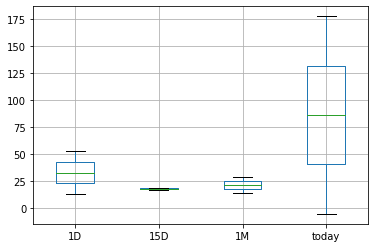

In [9]:
rent_df_15.boxplot(column=['1D', '15D', '1M', 'today'])

## 2016

In [10]:
rent_df_16 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_16 = ipos_2016["tickers"]
for t in tickers_16:
    rent_df_16.loc[t] = [rentability(t, c) for c in time]
rent_df_16['year'] = 2016
rent_df_16.describe()

,1D,15D,1M,today,year
count,1.0,1.00,1.0,1.00,1.0
mean,-4.0,-23.75,-20.0,-44.05,2016.0
std,NaN,NaN,NaN,NaN,NaN
min,-4.0,-23.75,-20.0,-44.05,2016.0
25%,-4.0,-23.75,-20.0,-44.05,2016.0
50%,-4.0,-23.75,-20.0,-44.05,2016.0
75%,-4.0,-23.75,-20.0,-44.05,2016.0
max,-4.0,-23.75,-20.0,-44.05,2016.0


<AxesSubplot:>

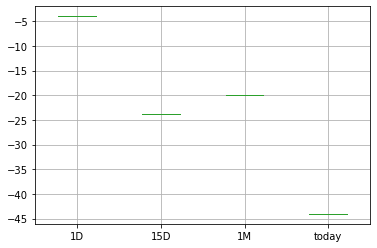

In [11]:
rent_df_16.boxplot(column=['1D', '15D', '1M', 'today'])

## 2017

In [12]:
rent_df_17 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_17 = ipos_2017["tickers"]
for t in tickers_17:
    rent_df_17.loc[t] = [rentability(t, c) for c in time]
rent_df_17['year'] = 2017
rent_df_17.describe()

,1D,15D,1M,today,year
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,3.354082,4.711792,6.391514,41.873696,2017.0
std,4.595710,6.849881,8.824979,75.001673,0.0
min,-2.666667,-5.000000,-5.555556,-77.936858,2017.0
25%,-0.666667,-0.555556,0.533333,7.111111,2017.0
50%,5.769231,4.258443,5.315789,41.333333,2017.0
75%,6.666667,8.910256,11.538462,95.142857,2017.0
max,8.947368,14.866667,20.238095,136.346154,2017.0


<AxesSubplot:>

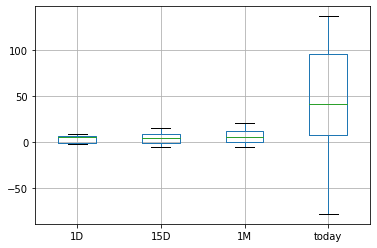

In [13]:
rent_df_17.boxplot(column=['1D', '15D', '1M', 'today'])

## 2018

In [14]:
rent_df_18 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_18 = ipos_2018["tickers"]
for t in tickers_18:
    rent_df_18.loc[t] = [rentability(t, c) for c in time]
rent_df_18['year'] = 2018
rent_df_18.describe()

,1D,15D,1M,today,year
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,14.984230,12.557339,15.639884,197.949629,2018.0
std,13.444859,12.147631,30.967431,223.461858,0.0
min,-0.540541,-0.432432,-19.459459,-35.489362,2018.0
25%,11.093366,7.017826,3.906634,91.985049,2018.0
50%,22.727273,14.468085,27.272727,219.459459,2018.0
75%,22.746615,19.052224,33.189555,314.669124,2018.0
max,22.765957,23.636364,39.106383,409.878788,2018.0


<AxesSubplot:>

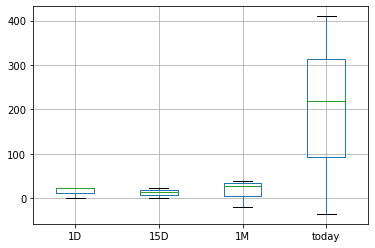

In [15]:
rent_df_18.boxplot(column=['1D', '15D', '1M', 'today'])

## 2019

In [16]:
rent_df_19 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_19 = ipos_2019["tickers"]
for t in tickers_19:
    rent_df_19.loc[t] = [rentability(t, c) for c in time]
rent_df_19['year'] = 2019
rent_df_19.describe()

,1D,15D,1M,today,year
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,-3.453271,-1.695585,-2.110681,15.744672,2019.0
std,13.997895,12.635760,10.706540,70.704679,0.0
min,-27.586207,-19.396552,-15.603448,-60.862069,2019.0
25%,-1.600000,-6.880000,-7.520000,-16.727273,2019.0
50%,0.458333,-2.000000,-0.848485,11.437700,2019.0
75%,3.090909,6.060606,0.000000,14.875000,2019.0
max,8.370607,13.738019,13.418530,130.000000,2019.0


<AxesSubplot:>

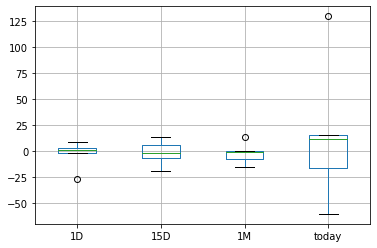

In [17]:
rent_df_19.boxplot(column=['1D', '15D', '1M', 'today'])

## 2020

In [18]:
rent_df_20 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_20 = ipos_2020["tickers"]
for t in tickers_20:
    rent_df_20.loc[t] = [rentability(t, c) for c in time]
rent_df_20['year'] = 2020
rent_df_20.describe()

,1D,15D,1M,today,year
count,27.000000,27.000000,27.000000,27.000000,27.0
mean,4.899335,6.625880,6.053839,17.264940,2020.0
std,11.071188,20.330873,34.456192,58.776145,0.0
min,-9.047619,-27.764706,-42.736842,-56.263158,2020.0
25%,-1.808279,-9.566014,-10.695767,-17.794737,2020.0
50%,0.000000,6.719368,3.490909,0.641711,2020.0
75%,13.289038,16.782580,12.768865,40.966967,2020.0
max,34.000000,57.777778,153.555556,244.100000,2020.0


<AxesSubplot:>

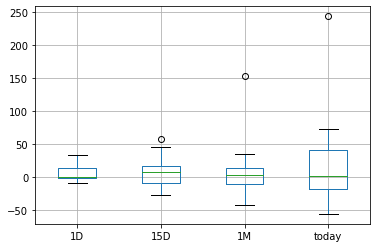

In [19]:
rent_df_20.boxplot(column=['1D', '15D', '1M', 'today'])

## 2021

In [20]:
rent_df_21 = pd.DataFrame(columns=["1D", "15D","today"])
time = [1, 10,-1]
tickers_21 = ipos_2021["tickers"]
for t in tickers_21:
    rent_df_21.loc[t] = [rentability(t, c) for c in time]
rent_df_21['year'] = 2021
rent_df_21.describe()

,1D,15D,today,year
count,23.000000,23.000000,23.000000,23.0
mean,9.338796,6.204570,6.270272,2021.0
std,23.493599,17.800533,30.602507,0.0
min,-13.152053,-20.643729,-40.307692,2021.0
25%,-3.198499,-5.916157,-10.465796,2021.0
50%,2.391629,1.666667,2.636364,2021.0
75%,13.061183,12.416667,8.657754,2021.0
max,96.969697,52.020202,85.153846,2021.0


<AxesSubplot:>

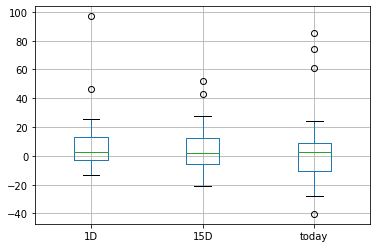

In [21]:
rent_df_21.boxplot(column=['1D', '15D', 'today'])

## 2015 to 2021

In [22]:
rent_df = pd.DataFrame(columns=["1D", "15D", "today"])
time = [1, 10, -1]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]
rent_df.describe()

,1D,15D,today
count,70.000000,70.000000,70.000000
mean,6.662619,5.785451,25.545258
std,17.016963,17.294561,76.780079
min,-27.586207,-27.764706,-77.936858
25%,-1.830065,-6.102941,-16.316478
50%,0.782526,4.237655,5.453293
75%,10.797448,14.775000,43.000000
max,96.969697,57.777778,409.878788


<AxesSubplot:>

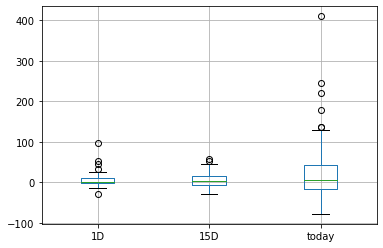

In [23]:
rent_df.boxplot(column=['1D', '15D', 'today'])